In [1]:
import os
import sys
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 7)
pd.set_option('display.max_columns', None)

sns.set_style("darkgrid")
%matplotlib inline

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))

from file_handler import FileHandler
from df_overview import DfOverview
from df_cleaner import DfCleaner
from df_outlier import DfOutlier
from plots import Plots

cleaner = DfCleaner()
plot = Plots()

2022-05-25 03:17:45,853 — DfOverview — DEBUG — Loaded successfully!
2022-05-25 03:17:45,892 — DfCleaner — DEBUG — Loaded successfully!
2022-05-25 03:17:45,901 — DfOutlier — DEBUG — Loaded successfully!


--- Logging error ---
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1264.0_x64__qbz5n2kfra8p0\lib\logging\handlers.py", line 74, in emit
    self.doRollover()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1264.0_x64__qbz5n2kfra8p0\lib\logging\handlers.py", line 431, in doRollover
    self.rotate(self.baseFilename, dfn)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.1264.0_x64__qbz5n2kfra8p0\lib\logging\handlers.py", line 115, in rotate
    os.rename(source, dest)
PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\Sebli\\Desktop\\10x Files\\Week 3\\Pharmaceutical-Sales-Prediction\\notebooks\\my_app.log' -> 'c:\\Users\\Sebli\\Desktop\\10x Files\\Week 3\\Pharmaceutical-Sales-Prediction\\notebooks\\my_app.log.2022-05-24'
Call stack:
  File "C:\Program Files\WindowsApps\PythonSoftwareFound

#### Read the Datasets

In [3]:
file_handler = FileHandler()
df_train = file_handler.read_csv("../data/train.csv")
df_test = file_handler.read_csv("../data/test.csv")
df_store = file_handler.read_csv("../data/store.csv")
# df_train.set_index("Store", inplace=True)

2022-05-25 03:17:48,854 — FileHandler — DEBUG — file read as csv
2022-05-25 03:17:48,886 — FileHandler — DEBUG — file read as csv
2022-05-25 03:17:48,892 — FileHandler — DEBUG — file read as csv


c:\Users\Sebli\Desktop\10x Files\Week 3\Pharmaceutical-Sales-Prediction\scripts\file_handler.py:28: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [7]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Cleaning Datasets

##### Check and Handle Missing Values in Training Dataset

In [8]:
train_overview = DfOverview(df_train)
train_overview.getOverview()

,count,missing_count,missing_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Store,1017209,0,0.0%,1115,0.11%,int64
DayOfWeek,1017209,0,0.0%,7,0.0%,int64
Date,1017209,0,0.0%,942,0.09%,object
Sales,1017209,0,0.0%,21734,2.14%,int64
Customers,1017209,0,0.0%,4086,0.4%,int64
Open,1017209,0,0.0%,2,0.0%,int64
Promo,1017209,0,0.0%,2,0.0%,int64
StateHoliday,1017209,0,0.0%,5,0.0%,object
SchoolHoliday,1017209,0,0.0%,2,0.0%,int64


We don't have any null values on train dataset fortunately.

##### Check and Handle Missing Values in Testing Dataset

In [9]:
test_overview = DfOverview(df_test)
test_overview.getOverview()

,count,missing_count,missing_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Id,41088,0,0.0%,41088,100.0%,int64
Store,41088,0,0.0%,856,2.08%,int64
DayOfWeek,41088,0,0.0%,7,0.02%,int64
Date,41088,0,0.0%,48,0.12%,object
Promo,41088,0,0.0%,2,0.0%,int64
StateHoliday,41088,0,0.0%,2,0.0%,object
SchoolHoliday,41088,0,0.0%,2,0.0%,int64
Open,41077,11,0.03%,2,0.0%,float64


All columns except Open are all missing value free. Open column have very small number of missing values. Let's look more on to it.

In [10]:
df_test[pd.isnull(df_test['Open'])]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


All missing values comes from store 622. Let's check if the training dataset has information about 622 store on this dates.

In [11]:
unknown_date = df_test[pd.isnull(df_test['Open'])]['Date'].values
[cols for cols in df_train['Store'] == 622 if cols in unknown_date]

[]

No training data is associated with store 622 on those days, therefore let us handle them with fill forward method.

In [12]:
df_test = cleaner.fix_missing_ffill(df_test, ['Open']) 

In [13]:
# Check for any missing values after the fix

test_overview.getOverview()

,count,missing_count,missing_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Id,41088,0,0.0%,41088,100.0%,int64
Store,41088,0,0.0%,856,2.08%,int64
DayOfWeek,41088,0,0.0%,7,0.02%,int64
Date,41088,0,0.0%,48,0.12%,object
Open,41088,0,0.0%,2,0.0%,float64
Promo,41088,0,0.0%,2,0.0%,int64
StateHoliday,41088,0,0.0%,2,0.0%,object
SchoolHoliday,41088,0,0.0%,2,0.0%,int64


##### Check and Handle Missing Values in Store Dataset

In [14]:
store_overview = DfOverview(df_store)
store_overview.getOverview()

,count,missing_count,missing_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Store,1115,0,0.0%,1115,100.0%,int64
StoreType,1115,0,0.0%,4,0.36%,object
Assortment,1115,0,0.0%,3,0.27%,object
Promo2,1115,0,0.0%,2,0.18%,int64
CompetitionDistance,1112,3,0.27%,654,58.65%,float64
CompetitionOpenSinceMonth,761,354,31.75%,12,1.08%,float64
CompetitionOpenSinceYear,761,354,31.75%,23,2.06%,float64
Promo2SinceWeek,571,544,48.79%,24,2.15%,float64
Promo2SinceYear,571,544,48.79%,7,0.63%,float64


We have six columns with missing values. From the six, CompetitionDistance has small number of null percentage which can be handled with median. 

In [15]:
# Handle missing values in CompetitionDistance with mean or median based on the skewness
df_store = cleaner.fill_numerical_columns(df_store, ['CompetitionDistance'])


In [16]:
store_overview.getOverview()

,count,missing_count,missing_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Store,1115,0,0.0%,1115,100.0%,int64
StoreType,1115,0,0.0%,4,0.36%,object
Assortment,1115,0,0.0%,3,0.27%,object
CompetitionDistance,1115,0,0.0%,655,58.74%,float64
Promo2,1115,0,0.0%,2,0.18%,int64
CompetitionOpenSinceMonth,761,354,31.75%,12,1.08%,float64
CompetitionOpenSinceYear,761,354,31.75%,23,2.06%,float64
Promo2SinceWeek,571,544,48.79%,24,2.15%,float64
Promo2SinceYear,571,544,48.79%,7,0.63%,float64


Let us check for numberical columns with missig values

In [17]:
print(np.sort(df_store['CompetitionOpenSinceMonth'].unique()))
print(np.sort(df_store['CompetitionOpenSinceYear'].unique()))
print(np.sort(df_store['Promo2SinceWeek'].unique()))
print(np.sort(df_store['Promo2SinceYear'].unique()))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]
[1900. 1961. 1990. 1994. 1995. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]
[ 1.  5.  6.  9. 10. 13. 14. 18. 22. 23. 26. 27. 28. 31. 35. 36. 37. 39.
 40. 44. 45. 48. 49. 50. nan]
[2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


##### Assumptions
- The `CompetitionOpenSinceMonth` missing values are due to those compititors are already available before Pharmaceutical starts, since we have no information in which month it starts, let's just fill it with the 1st month
- The dataset value `CompetitionOpenSinceYear` column holds ranged from 1900 - 2015. Let us assume the compititors are preexisted before, and let us fill the missing values with the initial year (1990)
- Fill missing Promo2SinceWeek column with 0
- Fill missing Promo2SinceYear column with 0

In [18]:
df_store['CompetitionOpenSinceMonth'] = df_store['CompetitionOpenSinceMonth'].fillna(1)
df_store['CompetitionOpenSinceYear'] = df_store['CompetitionOpenSinceYear'].fillna(1990)
df_store['Promo2SinceWeek'] = df_store['Promo2SinceWeek'].fillna(0)
df_store['Promo2SinceYear'] = df_store['CompetitionOpenSinceYear'].fillna(0)

In [19]:
print(df_store['PromoInterval'].unique())

[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [20]:
# Fill missing PromoInterval values with mode

df_store = cleaner.fill_with_mode(df_store, ['PromoInterval'])

In [21]:
store_overview = DfOverview(df_store)
store_overview.getOverview()

,count,missing_count,missing_percentage,unique_value_count,unique_percentage,dtype
label,,,,,,
Store,1115,0,0.0%,1115,100.0%,int64
StoreType,1115,0,0.0%,4,0.36%,object
Assortment,1115,0,0.0%,3,0.27%,object
CompetitionDistance,1115,0,0.0%,655,58.74%,float64
CompetitionOpenSinceMonth,1115,0,0.0%,12,1.08%,float64
CompetitionOpenSinceYear,1115,0,0.0%,23,2.06%,float64
Promo2,1115,0,0.0%,2,0.18%,int64
Promo2SinceWeek,1115,0,0.0%,25,2.24%,float64
Promo2SinceYear,1115,0,0.0%,23,2.06%,float64


Let us split the four PromoInterval values to independent columns and remove the PromoInterval column

In [22]:
df_store[['PromoInterval_1', 'PromoInterval_2', 'PromoInterval_3', 'PromoInterval_4']] = \
                                    df_store['PromoInterval'].str.split(',', expand=True)
                                    
df_store = cleaner.drop_columns(df_store, ['PromoInterval'])

In [23]:
df_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval_1',
       'PromoInterval_2', 'PromoInterval_3', 'PromoInterval_4'],
      dtype='object')

### Outlier Treatment
We will try to fix possible columns outliers which have non unique values. Columns with fewer unique values are not possibly challenged with outliers. 

In [24]:
df_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

Let us check for `Sales` and `Customers` columns, the others have fewer unique values

In [25]:
columns = ['Sales', 'Customers']
df_outliers = DfOutlier(df_train[columns].copy())
df_outliers.getOverview()

,number_of_outliers,percentage_of_outliers,skew,Q1,Median,Q3
label,,,,,,
Sales,26694,2.62%,0.641,3727.000,5744.000,7856.000
Customers,38095,3.75%,1.599,405.000,609.000,837.000


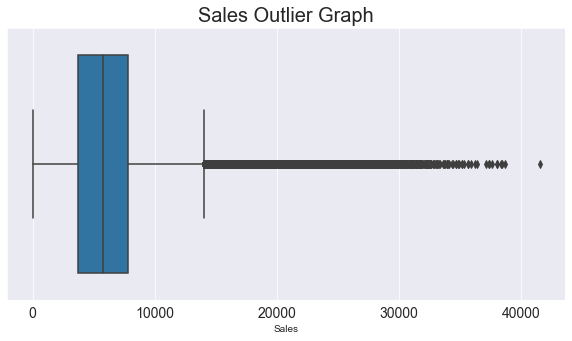

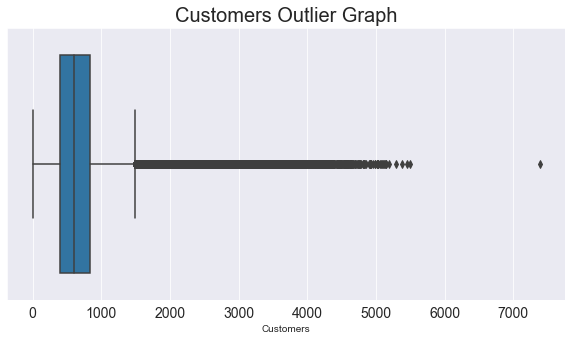

In [26]:
plot.box_plot(df_train, df_train['Sales'], "Sales Outlier Graph") 
plot.box_plot(df_train, df_train['Customers'], "Customers Outlier Graph")

Remove outliers of Sales and Customers columns

In [27]:
df_outliers = DfOutlier(df_train)
df_outliers.replace_outliers_with_iqr(['Sales', 'Customers'])

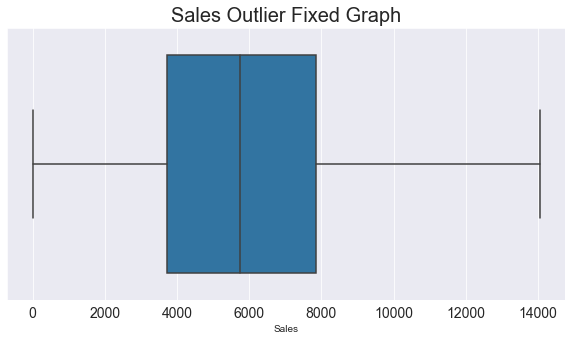

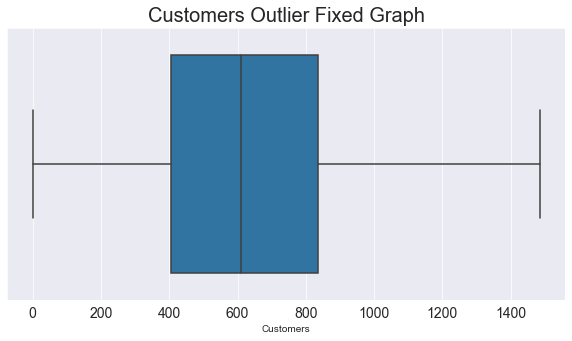

In [28]:
plot.box_plot(df_train, df_train['Sales'], "Sales Outlier Fixed Graph") 
plot.box_plot(df_train, df_train['Customers'], "Customers Outlier Fixed Graph")